<a href="https://colab.research.google.com/github/hosseinrezaie0/ML-Techniques-Explained/blob/main/Stratified%20Sampling/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sampling Bias**

In statistics, sampling bias refers to a bias in which a sample is collected in such a way that some members of the intended population have a lower or higher probability of being selected than others. As a result, the sample fails to accurately reflect the population, leading to skewed conclusions.

🤔 why sampling bias matters in machine learning?

  In machine learning, sampling bias often arises when training and test datasets do not properly represent the true distribution of the target variable or important features in the population.

  this leads to:
  1. Poor generalization: The model learns patterns from unrepresentative data.
  2. Overfitting to majority classes in classification tasks.

✅ prevent this bias, use **stratified sampling** — a technique that maintains the original class distribution across both training and test sets.








In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
path = '/content/drive/MyDrive/creditcard.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.3)

In [7]:
x_train_stratified, x_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.3, stratify=y)

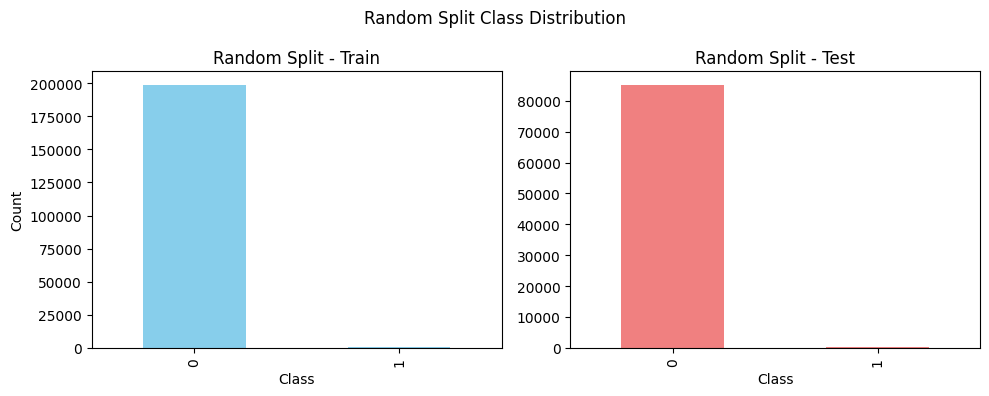

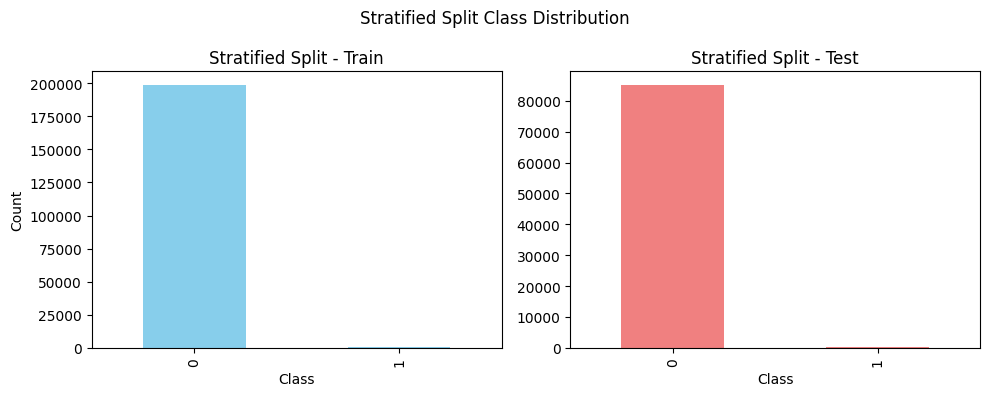

In [8]:
# Plot the target distribution
def plot_distribution(y_train, y_test, title_prefix):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    y_train.value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'{title_prefix} - Train')
    axes[0].set_ylabel("Count")

    y_test.value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{title_prefix} - Test')

    plt.suptitle(f'{title_prefix} Class Distribution')
    plt.tight_layout()
    plt.show()

# Plot for random
plot_distribution(y_train_random, y_test_random, 'Random Split')

# Plot for stratified
plot_distribution(y_train_stratified, y_test_stratified, 'Stratified Split')


with random sampling

In [9]:
y_train_random.value_counts() / len(y_train_random)

,count
Class,
0,0.998239
1,0.001761


In [10]:
y_test_random.value_counts() / len(y_test_random)

,count
Class,
0,0.99835
1,0.00165


with stratified sampling

In [11]:
y_train_stratified.value_counts() / len(y_train_stratified)

,count
Class,
0,0.998275
1,0.001725


In [12]:
y_test_stratified.value_counts() / len(y_test_stratified)

,count
Class,
0,0.998268
1,0.001732


| Split Type        | Class Balance Preserved? | Reliable? | Recommended? |
|-------------------|--------------------------|-----------|--------------|
| Random Split      | ❌ Maybe (by chance)      | ❌        | ❌ No        |
| Stratified Split  | ✅ Yes                   | ✅        | ✅ Yes       |


⚠ Even though the earlier random split happened to be okay, stratified splitting guarantees correctness every time.